## Quantum Energy Teleportation protocol for long distances

Protocol that improves energy teleportation between qubits far apart.

My modification.

### Import packages

Import necessary packages to create and simulate the protocol

In [61]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as sampler
from qiskit.visualization import plot_histogram

## circuits

### Circuit for measurement of the local hamiltoninan $Z$ or $H$

In [ ]:
def qt_Z(h,k):
   qc = QuantumCircuit(4)
    
   #Prepare the ground state
   theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
   qc.ry(2*theta,0)
   qc.cx(0,1)

   # Alice's projective measurement
   qc.barrier()
   qc.h(0)

   ## Teleport Activated State
   #create Bell pair
   qc.barrier()
   qc.h(2)
   qc.cx(2,3)

   # Prepare state teleportation
   qc.barrier()
   qc.cx(1,2)
   qc.h(1)

   # Condicional operation for state teleportation
   qc.barrier()
   qc.cx(2,3)
   qc.cz(1,3)

   # Energy extraction conditional operations on teleported state
   qc.barrier()
   phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

   qc.cry(-2*phi,0,3)

   qc.x(0)
   qc.cry(2*phi,0,3)
   qc.x(0)

   # Measurements
   qc.measure_all()

   return qc

### Circuit for measurement of the local hamiltoninan $XX$ or $V$

In [48]:
def qt_XX(h,k):
    qc = QuantumCircuit(4)
    
    #Prepare the ground state
    theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc.ry(2*theta,0)
    qc.cx(0,1)

    # Alice's projective measurement
    qc.barrier()
    qc.h(0)

    ## Teleport Activated State
    #create Bell pair
    qc.barrier()
    qc.h(2)
    qc.cx(2,3)

    # Prepare state teleportation
    qc.barrier()
    qc.cx(1,2)
    qc.h(1)

    # Condicional operation for state teleportation
    qc.barrier()
    qc.cx(2,3)
    qc.cz(1,3)

    # Energy extraction conditional operations on teleported state
    qc.barrier()
    phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

    qc.cry(-2*phi,0,3)

    qc.x(0)
    qc.cry(2*phi,0,3)
    qc.x(0)

    # Measurements
    qc.barrier()
    qc.h(3)
    qc.measure_all()

    return qc

### Show circuit

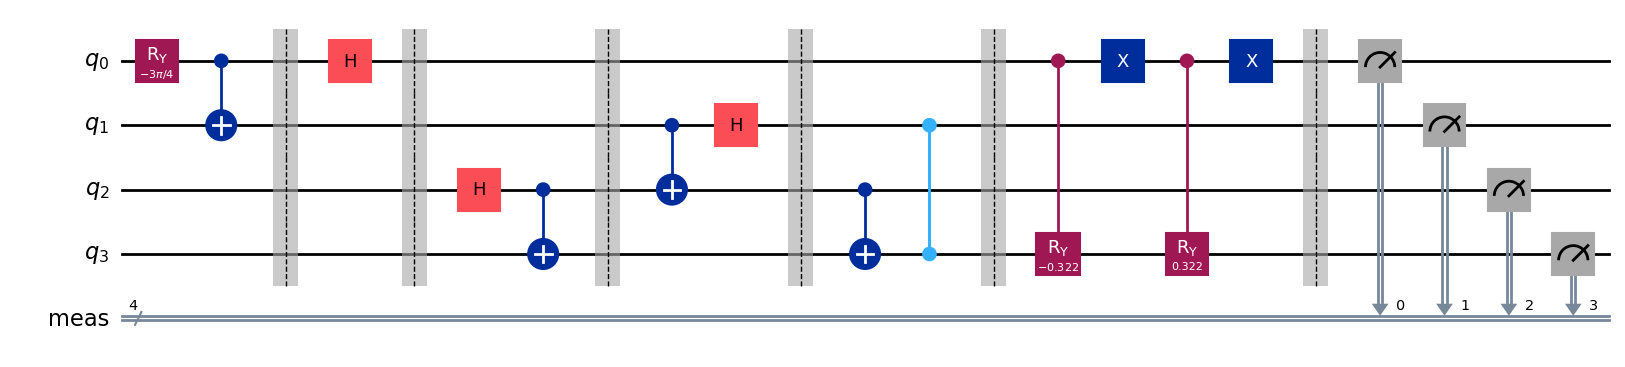

In [6]:
qc = qt_Z(1,1)
qc.draw('mpl')

### Circuit for measurement with Estimator

In [67]:
def qt_T(h,k):
    qc = QuantumCircuit(4)
    
    #Prepare the ground state
    theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc.ry(2*theta,0)
    qc.cx(0,1)

    # Alice's projective measurement
    qc.barrier()
    qc.h(0)

    ## Teleport Activated State
    #create Bell pair
    qc.barrier()
    qc.h(2)
    qc.cx(2,3)

    # Prepare state teleportation
    qc.barrier()
    qc.cx(1,2)
    qc.h(1)

    # Condicional operation for state teleportation
    qc.barrier()
    qc.cx(2,3)
    qc.cz(1,3)

    # Energy extraction conditional operations on teleported state
    qc.barrier()
    phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

    qc.cry(-2*phi,0,3)

    qc.x(0)
    qc.cry(2*phi,0,3)
    qc.x(0)

    # Measurements
    qc.barrier()
    qc.h(0)
    qc.measure_all()

    return qc

## Simulate circuit

Simulate circuits with Aer Simulator 

In [58]:
# Initiate simulator
simulator = AerSimulator()

# Parameters
h = 1; k = 1;
n_shots = 100000

# Generate circuit
qc = qt_Z(h, k)
transpiled_Z = transpile(qc, simulator, optimization_level=3)

qc = qt_XX(h, k)
transpiled_XX = transpile(qc, simulator, optimization_level=3)

# Run job 
job_Z = simulator.run([transpiled_Z], shots=n_shots)
job_XX = simulator.run([transpiled_XX], shots=n_shots)


### Show results for simulation

H_A = 0.26446678118654743 ± 0.0028356125094942002
H_B = 0.26446678118654743 ± 0.0028356125094942002


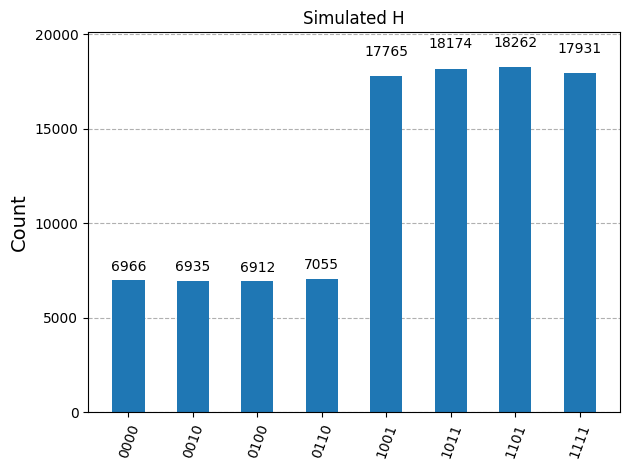

In [59]:
# Extract results
result = job_Z.result()
counts = result.get_counts()

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_A += h*(-1)**int(bit_string[0])*count/n_shots
        ene_B += h*(-1)**int(bit_string[3])*count/n_shots
        
        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_A =",ene_A,"±",np.std(error_A)/np.sqrt(n_shots))
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))

plot_histogram(counts, title="Simulated H")

V = -0.378626437626905 ± 0.0028030781908466268


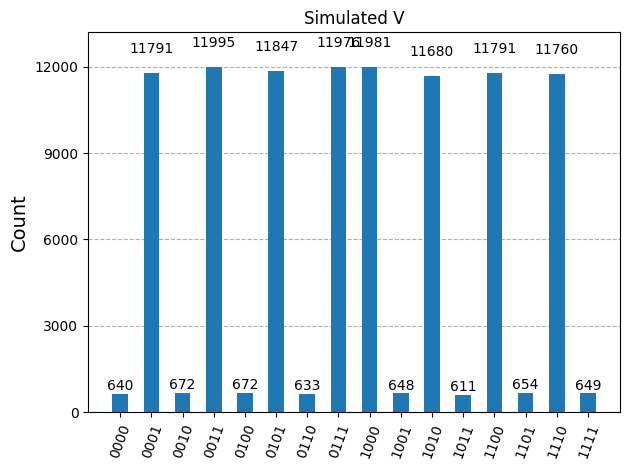

In [60]:
# Extract results
result = job_XX.result()
counts = result.get_counts()

ene_XX=(2*k**2)/(np.sqrt(h**2+k**2))

error_XX=[]

for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_XX += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_XX.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

print("V =",ene_XX,"±", np.std(error_XX)/np.sqrt(n_shots))

plot_histogram(counts, title="Simulated V")

### Import backend

Select an ibm QPU to run the circuits 

In [69]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backend = service.backend('ibm_brisbane')

### Execute modified model in with Sampler

Run circuits with Sampler Primitive and error mitigation

In [ ]:
# Import IBM packages
from qiskit_ibm_runtime import Batch, SamplerV2 as sampler

variables = [(1,0.2),(1,0.5),(1,1),(1.5,1), (1,1.5)]

with Batch(backend=backend):
    n_shots = 3000

    # initiate sampler and enable error mitigation
    sampler = sampler()
    options = sampler.options
    options.dynamical_decoupling.enable = True
    options.twirling.enable_gates = True
    

    for variable in variables:
        h = variable[0]
        k = variable[1]

        # Generate circuits Z and XX
        circuit_H = qt_Z(h,k)
        transpiled_Z = transpile(circuit_H, backend=backend, optimization_level=3)

        circuit_V = qt_XX(h,k)
        transpiled_XX = transpile(circuit_V, backend=backend, optimization_level=3)

        # Run jobs for each circuit
        job_Z = sampler.run([(transpiled_Z)], shots=n_shots)
        job_Z.update_tags([f'k={k},h={h}', 'error mitigated','sampler','H','LD',f'{n_shots}'])  # Add tags to job
        print(f"Circuit H, ID = {job_Z.job_id()}, h = {h}  k = {k}") 

        job_XX = sampler.run([(transpiled_XX)], shots=n_shots)
        job_XX.update_tags([f'k={k},h={h}', 'error mitigated','sampler','V','LD'])  # Add tags to job
        print(f"Circuit V, ID = {job_XX.job_id()}, h = {h} k = {k}")

Circuit H ID = d0t7fdq4p3dc73f34ivg h = 1 k = 0.2
Circuit V ID = d0t7fe6mu1ms73d69uug h = 1 k = 0.2
Circuit H ID = d0t7fenp51os73b0pe10 h = 1 k = 0.5
Circuit V ID = d0t7feq4p3dc73f34j20 h = 1 k = 0.5
Circuit H ID = d0t7fffp51os73b0pe2g h = 1 k = 1
Circuit V ID = d0t7ffg7m9ds739h0240 h = 1 k = 1
Circuit H ID = d0t7ffo7m9ds739h0250 h = 1.5 k = 1
Circuit V ID = d0t7fga4p3dc73f34j3g h = 1.5 k = 1
Circuit H ID = d0t7fgi4p3dc73f34j40 h = 1 k = 1.5
Circuit V ID = d0t7fgvp51os73b0pe40 h = 1 k = 1.5


### Run model with Estimator

Run job with Estimator Primitive and error mitigation

In [ ]:
# Import Estimator 
from qiskit_ibm_runtime import Batch, EstimatorV2 as estimator
from qiskit.transpiler import preset_passmanagers
from qiskit.quantum_info import SparsePauliOp 

# Parameters h and k
variables = [(1,0.2),(1,0.5),(1,1),(1.5,1),(1,1.5)]

transpiler = preset_passmanagers.generate_preset_pass_manager(optimization_level=3, backend=backend)

#  Run job in Batch mode
with Batch(backend=backend):

    for variable in variables:
        h = variable[0]
        k = variable[1]
        observables = [SparsePauliOp('ZIII', h), SparsePauliOp('XIIX', 2*k)]

        # Generate circuit
        circuit_T = qt_T(h,k)
        qc_T = transpiler.run(circuit_T)
        
        # Run jobs
        transpiled_observable = observables[0].apply_layout(qc_T.layout)
        job_H = estimator(options={"resilience_level": 2}).run([(qc_T, transpiled_observable)]) 
        job_H.update_tags([f'k={k},h={h}', 'error mitigated', 'estimator', 'H', 'LD']) # Add tags
        print(f"Estimator H, ID = {job_H.job_id()}, h = {h} k = {k}") 

        transpiled_observable = observables[1].apply_layout(qc_T.layout)
        job_XX = estimator(options={"resilience_level": 2}).run([(qc_T, transpiled_observable)])
        job_XX.update_tags([f'k={k},h={h}', 'error mitigated', 'estimator', 'H', 'LD']) # Add tags 
        print(f"Estimator V, ID = {job_XX.job_id()}, h = {h} k = {k}") 

Estimator V ID = d0r8uu7p51os73auoi6g h = 1 k = 1


### Results

H_B = 0.44470678118654744 ± 0.01364658374832324
Estimated B = 0.26240227562774115 ± 0.015668315770563164


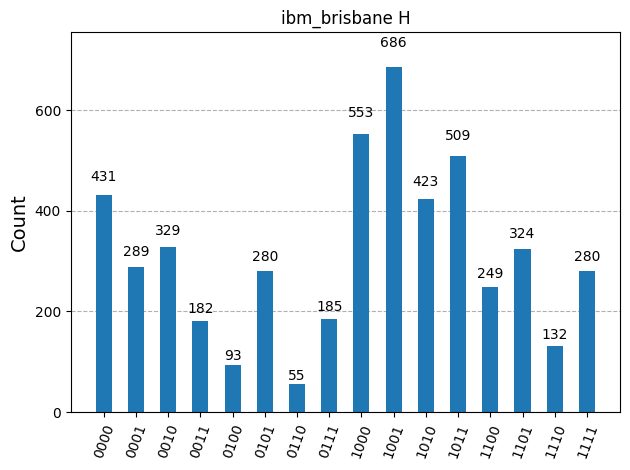

In [ ]:
# Extract results

# Sampler
jobS = service.job('d056hbxkzhn0008wdwk0') 
result = jobS.result()[0]
counts = result.data.meas.get_counts()

# Estimator
jobT = service.job('d0byw1gqnmvg0087fsj0')
result = jobT.result()[0]
exp_value = result.data.evs
value_error = result.data.stds

# parameters
h = 1; k = 1;
n_shots = 3000

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))
est_B = exp_value + ene_B

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_A += h*(-1)**int(bit_string[0])*count/n_shots
        ene_B += h*(-1)**int(bit_string[3])*count/n_shots 

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))
print("Estimated B =",est_B,"±",value_error)

plot_histogram(counts, title=f"{backend.name} H")

V = 0.15181356237309485 ± 0.02193784966672896
Estimated V = -0.29532263456872343 ± 0.014083987282820981


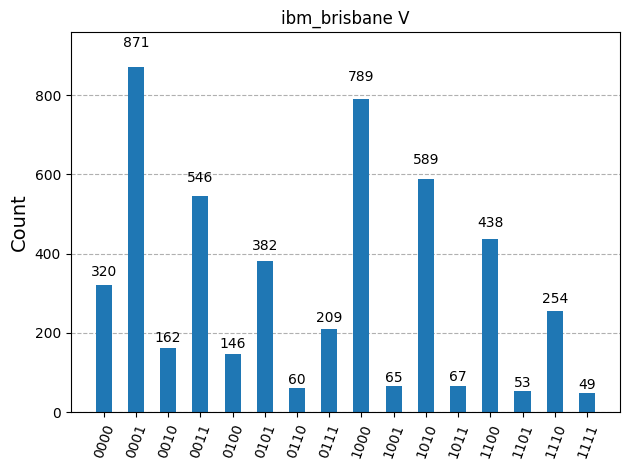

In [ ]:
# Extract results

# Sampler
jobS = service.job('d056h956rr3g008e5mxg')
result = jobS.result()[0]
counts = result.data.meas.get_counts()

# Estimator
jobT = service.job('d0byhhy6rr3g0087np90')
result = jobT.result()[0]
exp_value = result.data.evs
value_error = result.data.stds

# parameters
h = 1; k = 1;
n_shots = 3000

# Energies
ene_V=(2*k**2)/(np.sqrt(h**2+k**2))
est_V = exp_value + ene_V

# Error arrays
error_V=[]

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_V += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_V.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

# Print results
print("V =",ene_V,"±", np.std(error_V)/np.sqrt(n_shots))
print("Estimated V =",est_V,"±",value_error)

plot_histogram(counts, title=f"{backend.name} V")

### Show Transpiled circuit (see qubit mapping)

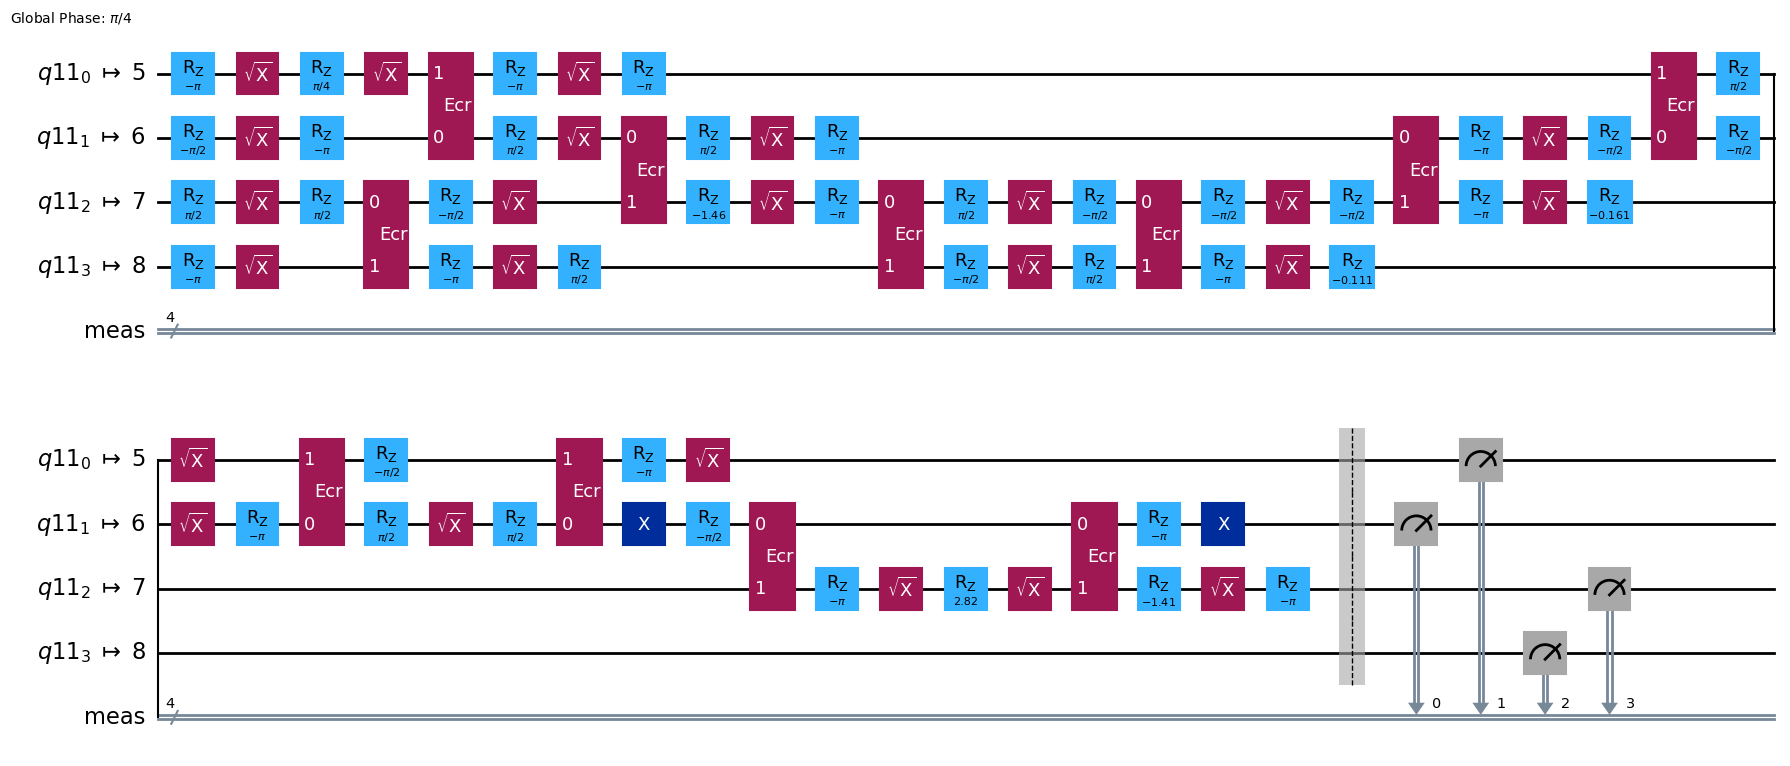

In [19]:
job = service.job('d056hbxkzhn0008wdwk0')
pubs = job.inputs['pubs'] 
circuits = [pub[0] for pub in pubs]
circuits[0].draw('mpl')